In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gaussian_kernel(size, sigma=1):
  """Generates a Gaussian kernel manually."""
  kernel = np.zeros((size, size), dtype=np.float32)
  center = size // 2

  for x in range(size):
      for y in range(size):
          diff = np.square(x - center) + np.square(y - center)
          kernel[x, y] = np.exp(-diff / (2 * np.square(sigma)))

  return kernel / np.sum(kernel)

In [20]:
def apply_gaussian_filter(image, kernel):
  """Applies a Gaussian filter to a colored image using manual convolution."""
  # Get image dimensions
  if len(image.shape) == 3:
      image_height, image_width, channels = image.shape
  else:
      image_height, image_width = image.shape
      channels = 1

  kernel_size = kernel.shape[0]
  pad_width = kernel_size // 2

  # Handle both colored and grayscale images
  if channels == 1:
      # Pad the image to handle borders
      padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
      smoothed_image = np.zeros_like(image)

      # Perform convolution
      for i in range(image_height):
          for j in range(image_width):
              region = padded_image[i:i + kernel_size, j:j + kernel_size]
              smoothed_image[i, j] = np.sum(region * kernel)
  else:
      # For colored images, process each channel separately
      smoothed_image = np.zeros_like(image)

      for c in range(channels):
          # Pad the channel
          padded_channel = np.pad(image[:,:,c], pad_width, mode='constant', constant_values=0)

          # Perform convolution for each channel
          for i in range(image_height):
              for j in range(image_width):
                  region = padded_channel[i:i + kernel_size, j:j + kernel_size]
                  smoothed_image[i, j, c] = np.sum(region * kernel)

  return smoothed_image

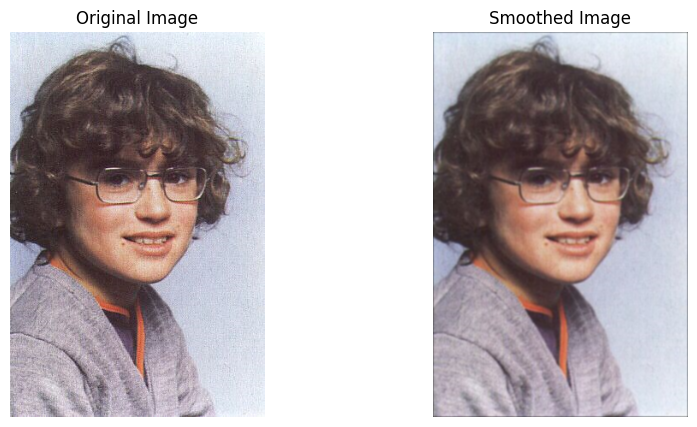

In [ ]:


# Load a colored image
image = cv2.imread(r'C:\Users\acer\Downloads\old_photo_restoration\photos\old\a.png')
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate a Gaussian kernel
kernel = gaussian_kernel(size=5, sigma=1)

# Apply Gaussian filter
smoothed_image = apply_gaussian_filter(image, kernel)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed_image.astype(np.uint8))
plt.axis('off')

plt.show()